# Organizando uma eleição
(créditos ao professor Rafael)

O último ano foi extremamente desafiador para você. Além de estarmos vivendo uma pandemia que aumentou nossa preocupação com a nossa própria vida e com nossos entes queridos e estarmos obrigados a passar mais tempo em casa para garantir nossa segurança, você se matriculou em um curso de programação e ciência de dados para mudar de rumo em sua carreira!

O _timing_ pareceu ideal: mais tempo em casa, mais tempo para estudar. Porém, você esbarrou em algumas dificuldades. O condomínio está em reforma, e você passa o dia ao som de marretadas no piso. Durante a noite, no horário da sua aula online, seus vizinhos - um casal passando por dificuldades na relação - costumam discutir em voz alta. A discussão deles frequentemente acorda o bebê do outro vizinho e todos os cachorros do andar no prédio. Deixar para estudar no final de semana não ajuda, pois o filho adolescente da família do apartamento logo acima do seu costuma trazer os colegas de banda para ensaiar. 

A situação se tornou insustentável, e o síndico - que é o mesmo senhorzinho desde que você se mudou para esse condomínio, há mais de 10 anos - não toma atitudes e não gosta de ser perturbado. Chegou a hora de organizar uma eleição para um novo síndico, e você tomou a iniciativa de montar um sistema eletrônico para auxiliar na votação.

## Entidades envolvidas

Podemos imaginar as seguintes entidades envolvidas na eleição:

* **Morador**: representa cada uma das pessoas que moram no prédio. Possui um nome, um Apartamento e é capaz de depositar um voto em um Candidato em uma Urna.
* **Candidato**: é um tipo especial de Morador. Possui tudo o que o morador possui, mas também possui um número que será usado para representá-lo na Urna e uma contagem individual de votos.
* **Apartamento**: representa cada uma das unidades do prédio. Possui uma lista de moradores e um status indicando se ele já votou ou não. Cada apartamento tem direito a exatamente 1 voto. Se a sua filha já votou, você não pode mais votar!
* **Urna**: coleciona votos. Ela possui uma coleção de candidatos e uma coleção de moradores (lembrando que o candidato também conta como morador!). Ela armazena a quantidade de votos de cada candidato e é capaz de incrementar essa quantidade ao receber um voto novo. Ela também possui uma coleção de apartamentos e é capaz de determinar quais apartamentos já votaram (mas não qual apartamento votou em cada candidato - o voto é secreto). Quando o último apartamento votar, ela publica os resultados e declara o vencedor.

Vamos pensar juntos em meios de implementar cada uma das classes.

### Morador

A classe mais básica de nossa eleição, representando cada uma das pessoas que habitam no condomínio. O morador obrigatoriamente possui um nome e um Apartamento.

Seu construtor pode ou não receber uma string contendo o nome, e pode ou não receber um objeto Apartamento. Caso ele não receba um nome, deverá solicitar a digitação de um através do input. Caso ele não receba um objeto Apartamento, deverá pedir por input o número do apartamento e criar o objeto.

O nome e apartamento digitados ou recebidos deverão se tornar atributos do objeto.

Nosso objeto também deverá possuir um método para votar. Ele deverá receber um objeto Urna e pode receber um número inteiro correspondente ao número de um candidato ou, caso não receba, irá ler o número pelo teclado. Ela deverá primeiro verificar se o seu apartamento já votou, e caso não tenha, ela irá chamar o método de acrescentar voto na Urna, informando o número de seu candidato e passando seu objeto apartamento. Caso contrário, ela exibirá uma mensagem alertando que esse apartamento já votou.

In [1]:
class Morador:

    '''
    Cria uma classe que representa
    um morador de um condomínio
    '''

    # Método construtor, com nome e apt como parâmetros
    # opcionais, que podem ser pedidos por input
    
    def __init__(self, nome='', apartamento=None):
        '''
        Construtor

        Parâmetros:
        -----------
        nome: str : opcional
            nome do condômino
        apt: Apartamento : opcional
            objeto Apartamento onde o Morador reside
        '''

        # Obedecendo os critérios de projeto,
        # ambos os parâmetros são opcionais
        # e no caso de não serem fornecidos na
        # criação do objeto, são pedidos por input

        # input opcional e definição do nome do Morador

        # Se o nome não foi passado na definição
        #self.nome = nome
        #self.apartamento = apartamento
        if nome == '':
            # é pedido o nome, do tipo str, que é checado
            self.nome = str(input("Digite o nome do morador:"))
        else:
            # caso o nome tenha sido passado, testa o tipo da variável nome
            if isinstance(nome, str):
                # Atribuindo o valor passado
                self.nome = nome
            else:
                # Caso contrário, dispara um erro
                raise ValueError("O nome deve ser do tipo string.")

        # input opcional e definição do Apartamento

        # Se o apartamento não foi passado na definição
        if apartamento == None:
            # é pedido o número do apartamento, do tipo int, que é checado
            n_apartamento = int(input("Digite o número do apartamento:"))
            # com o número de todos os apartamentos instanciados
            for instancia in Apartamento.instances:
                if n_apartamento == instancia.numero_apt:
                    # e, se ele existe, a instância é atribuída ao Morador
                    self.apartamento = instancia


            if self.apartamento == None:
                # caso contrário, dispara um erro
                raise ValueError('Este apartamento não existe.')
        else:
            if isinstance(apartamento, Apartamento):
                # e caso ele tenha sido passado na definição, é atribuído, caso seja do tipo Apartamento
                self.apartamento = apartamento
            else:
                # caso contrário, levanta um erro
                raise TypeError('Apartamento precisa ser do tipo Apartamento.')

    # Define o método de voto
    def votar(self, urna, numero_candidato=0):

        '''
        Caso o número do candidato não tenha sido definido
        na chamada do método, pede o número do candidato
        depois de checar se o apartamento onde reside o Morador
        ainda não possui voto, chama o método "concluir_voto"
        e devolve uma mensagem de sucesso

        Parâmetros
        ----------

        urna: obj
            urna que receberá o voto

        numero_candidato : int
            número do candidato que receberá o voto
        '''

        # checa se a urna de votação está criada
        if not isinstance(urna, Urna):
            raise TypeError("Urna precisa ser do tipo Urna")

        # Caso o número do candidato não tenha sido passado, pede o
        # o número do candidato pelo input, checando o tipo int
        if numero_candidato == 0:
            numero_candidato = int(input('Digite o número do candidato em que deseja votar:'))
        
        # números de candidatos iniciam a partir do número 10, portanto:
        if numero_candidato < 10:
            raise ValueError("Este não é um número de candidato válido")

        # lista auxiliar que receberá o ID dos candidatos
        lista_numero = []
        for candidato in urna.candidato:
            lista_numero.append(candidato.numero_id)
        
        # verificação se o voto do Morador é em um candidato válido e existente
        numero_candidato_maior = max(lista_numero)
        if numero_candidato > numero_candidato_maior:
            raise ValueError("Esse número de candidato não está cadastrado.")

        if self.apartamento.ja_votou == 1:
            print(f'O Apartamento {self.apartamento.numero_apt} já votou.')

        if self.apartamento.ja_votou == 0:
            urna.receber_voto(self.apartamento, numero_candidato)
      

### Candidato

Objetos da classe Candidato são, necessariamente, moradores. Eles possuem as mesmas informações e as mesmas ações que um morador. O que isso significa em programação orientada a objeto?

Ele possui outros dois atributos: o seu número que será usado para identificá-lo na Urna e sua contagem de votos. Ambos devem ser inicializados com valor 0. 

Ele deve oferecer métodos para que seu número seja configurado (quando cadastrarmos o candidato na Urna, ela irá fornecer um número para ele), bem como para que sua contagem de votos seja atualizada (ao final da votação, a Urna irá atualizar a contagem de todos os candidatos).

In [2]:
class Candidato(Morador):

    '''
    Cria uma classe que representa
    um candidato à eleição do condomínio
    '''

    # lista de instâncias de Candidatos 
    # que será alimentada
    instances = []

    def __init__(self, nome, apartamento):

        '''
        Construtor

        Parâmetros:
        -----------
        nome: str
            nome do condômino, herdado da classe Morador
        apt: Apartamento : opcional
           objeto Apartamento, herdado da classe Morador
        '''

        # trazer a herança da classe Morador
        super().__init__(nome, apartamento)

        # definimos um ID que será o número que irá
        # representá-lo na Urna
        self.numero_id = 0

        # contagem individual dos votos do Candidato
        self.contagem_votos = 0

        # inclui o Candidato à lista de instâncias
        # criada na classe Candidato
        Candidato.instances.append(self)

    def cadastrar_candidato(self, morador):

        '''
        Cadastra um candidato 
        (necessariamente morador)

        Parâmetros
        ----------

        morador: obj
            Objeto morador que será cadastrado 
            como um candidato à eleição
        '''

        # herda o nome a apartamento do objeto morador 
        # que está sendo cadastrado como candidato
        self.nome = morador.nome
        self.apartamento = morador.apartamento

    def cadastrar_urna(self, Urna):

        '''
        Cadastra o candidato na urna

        Parâmetros
        ----------

        Urna: obj
            urna que receberá o candidato
        '''
        
        Urna.cadastrar_candidato(self)

    def atualizar_votos(self, Urna):

        '''
        Atualiza a contagem dos votos recebidos pelo candidato
    
        Parâmetros
        ----------

        Urna: obj
            urna que armazenará os votos do candidato
        '''

        self.contagem_votos = Urna.dic_numero_voto[numero_id]

### Apartamento

Objetos da classe Apartamento irão agregar objetos Morador. Isso significa que um de seus atributos será uma lista de moradores. Quando um Apartamento é criado, sua lista começará vazia. O Apartamento deve oferecer métodos para adicionar moradores novos (recebe um objeto Morador e adiciona à lista) e para visualizar seus moradores.

Cada apartamento tem direito a exatamente um voto na eleição para síndico. Portanto, cada objeto também deve ter um atributo indicando se aquele apartamento já votou ou não. A classe deve fornecer meios para que a esse atributo possa ser atualizado, pois quando um morador votar, a urna irá alterar esse atributo registrando que o apartamento já votou.

In [3]:
class Apartamento:

    '''
    Cria uma classe que representa cada
    apartamento de um condomínio
    '''

    # Cria uma lista de objetos instanciados para
    # a checagem e definição do número do Apartamentos
    instances = []
    lista_numeros_apt = []

    def __init__(self, numero_apt=0):

        '''
        Construtor

        Parâmetros:
        -----------
        numero_apt: int
            número do Apartamento
        lista_moradores: list - []
            lista com os moradores do apartamento (inicia vazia)
        ja_votou: bool
            indica se o apartamento já votou na eleição (inicia False)
        '''

        # verifica se o número do apartamento já existe entre
        # as instâncias declaradas. Se sim, levanta um erro,
        # indicando todos os apartamentos que já existem
        if numero_apt in Apartamento.lista_numeros_apt:
            raise ValueError(f'Os seguintes apartamentos {Apartamento.lista_numeros_apt} já existem!')

        self.numero_apt = numero_apt

        # Em caso de novo número, junta o
        # numero_apt à lista de apartamentos
        # e o self à lista de instâncias
        Apartamento.lista_numeros_apt.append(int(numero_apt))
        Apartamento.instances.append(self)

        # Além disso, inicializamos a lista de moradores
        # e o booleano ja_votou
        self.lista_moradores = []
        self.ja_votou = False

    def adicionar_morador(self, morador):

        '''
        Adiciona o morador à
        lista de moradores do apartamento

        '''

        # Testa se o novo Morador é do tipo Morador
        if not isinstance(morador, Morador):
            raise TypeError("Residente a ser adicionado deve ser do tipo Morador")

        # Testa se o morador a ser adicionado
        # já é morador de outro apartamento
        for instancia in Apartamento.instances:
            if morador in instancia.lista_moradores:
                raise ValueError("Morador já é morador de outro apartamento")

        # Passando nos dois testes, o morador é acrescentado à lista de moradores
        self.lista_moradores.append(morador)

    def visualizar_moradores(self):

        '''
        Retorna a lista
        de moradores do apartamento
        '''
        
        return print(lista_moradores)

    # def __repr__(self):
    # return f'{self.numero_apt}'

### Urna
A classe mais complexa do projeto. Ela é responsável por boa parte da lógica da nossa eleição.

Seu construtor deverá criar como atributos uma coleção de apartamentos e outra de candidatos - escolha a estrutura de dados que julgar mais adequada.

A classe deve fornecer métodos que permitam o cadastro de apartamentos (recebendo como parâmetro objetos Apartamento já existentes) e candidatos (idem). Ao receber um candidato para cadastro, ela deverá gerar um número **único** para representar esse candidato na eleição e irá ajustar esse atributo diretamente no objeto candidato.

Ela também deve ter um método para receber um voto, que deve receber um objeto apartamento e o número de um candidato. Ela deve atualizar a contagem de voto do candidato cujo número foi recebido, e marcar aquele apartamento como já votado. Se o apartamento que votou era o último que ainda podia votar, a urna deve imediatamente imprimir os resultados.

Bole uma maneira que a urna possa sinalizar para o programa principal se ela já encerrou a votação ou não.

In [4]:
class Urna:

    '''
    Cria uma clase que representa a urna que recebe
    e armazena os votos da eleição
    '''

    def __init__(self):

        '''
        Construtor

        Parâmetros
        ----------

        apartamentos: list
            lista de apartamentos que serão cadastrados na urna

        candidato: list
            lista de candidatos que serão cadastrados na urna     
        '''

        # recebe a lista de apartamentos e de candidatos
        self.apartamento = Apartamento.instances
        self.candidato = Candidato.instances

        # cria um dicionário vazio que receberá como chave
        # o candidato e como valor o número do candidato
        dicionario_candidatos = {}

        # cria um dicionário vazio que receberá como chave o número 
        # do candidato e como valor a quantidade de votos
        dicionario_numero_voto = {}

        numero_candidato = 10
        # o primeiro candidato receberá o número 10 (escolha de projeto)

        # percorre a lista de candidatos
        for candidato_pre_proc in self.candidato:

            # aumenta o contador para o próximo candidato receber o próximo número
            numero_candidato = numero_candidato + 1

            # adiciona o número do candidato no dicionário de candidatos
            dicionario_candidatos[candidato_pre_proc] = numero_candidato

            # determina o ID do candidato (como sendo o numero_candidato)
            candidato_pre_proc.numero_id = numero_candidato

            # inicia a contagem dos votos para tal candidato
            dicionario_numero_voto[numero_candidato] = 0

        self.dic_candidatos = dicionario_candidatos
        self.dic_numero_voto = dicionario_numero_voto

        self.dicionario_apartamentos = {}
        for apartamento_preproc in self.apartamento:
            self.dicionario_apartamentos[apartamento_preproc] = False

    def cadastrar_apartamento(self, apartamento_cadastro):

        '''
        Cadastra o apartamento na urna

        Parâmetros
        ----------

        apartamento: Apartamento
            objeto apartamento que será cadastrado na urna
        '''

        # checa se o apartamento é da classe Apartamento
        if not isinstance(apartamento_cadastro, Apartamento):
            raise TypeError("O apartamento tem que ser do tipo Apartamento")

        # verifica se o apartamento já existe
        if apartamento_cadastro in self.apartamento:
            raise ValueError("O apartamento já está inscrito.")

        self.apartamento.append(apartamento_cadastro)
        self.dicionario_apartamentos[apartamento_cadastro] = False

    def cadastrar_candidato(self, candidato_cadastro):

        '''
        Cadastra o candidato na urna

        Parâmetros
        ----------

        candidato: Candidato
            candidato que será cadastrado na urna
        '''

        # antes de acrescentar o candidato na lista, 
        # checa se o candidato é do tipo Candidato
        if isinstance(candidato_cadastro, Candidato):
            self.candidato.append(candidato_cadastro)
        else:
            raise TypeError("O candidato tem que ser do tipo Candidato")
        
        # verifica se o candidato já existe
        if candidato_cadastro in self.candidato:
            raise ValueError("O candidato já está inscrito.")

        # define um contador novo para o candidato
        # a partir da posição do último
        contador_novo = dic_candidatos[self.candidato[-1]] + 1

        # atrela o candidato ao contador
        self.dic_candidatos[candidato_cadastro] = contador_novo

        # inicia a contagem dos votos do novo candidato com zero
        self.dic_numero_voto[contador_novo] = 0

        # define o ID do novo candidato
        candidato_cadastro.numero_id = contador_novo

        # append o candidato na lista de candidatos
        self.candidato.append(candidato_cadastro)

    def receber_voto(self, apartamento_novo, numero_candidato):

        '''
        Cadastra o voto na urna

        Parâmetros
        ----------

        apartamento_novo = int
            número do apartamento a votar

        numero_candidato = int
            número do candidato a receber voto
        '''

        # segunda checagem se o apartamento já votou
        if self.dicionario_apartamentos[apartamento_novo] == True:
            raise ValueError("O apartamento está mentindo. Eles já votaram. Fraude eleitoral!!!")
        apartamento_novo.ja_votou = True
        self.dicionario_apartamentos[apartamento_novo] = True

        self.dic_numero_voto[numero_candidato] = self.dic_numero_voto[numero_candidato] + 1

        # validação se todos os apartamentos já votaram:
        valida_votos_apt = 0
        for apart in self.apartamento:
            if apart.ja_votou == False:
                valida_votos_apt = valida_votos_apt + 1

        if valida_votos_apt > 0:
            return print(f'Faltam os votos de {valida_votos_apt} apartamentos.')

        if valida_votos_apt == 0:
            for candidato_inscrito in self.candidato:
                candidato_inscrito.atualizar_votos

                return print(self.dic_numero_voto)

## O programa principal

Seu programa principal terá 3 etapas - fique à vontade para modularizar essas etapas com o auxílio de funções, ou mesmo utilizar outras classes se julgar necessário.

* Cadastro: o programa deverá ler informações sobre cada pessoa e ir criando os objetos Morador/Candidato e Apartamento correspondentes. Lembre-se de sempre perguntar se a próxima pessoa a ser lida é ou não candidata para decidir a melhor forma de instanciá-la no sistema.

* Configuração: o programa deverá utilizar as informações obtidasna etapa anterior para criar uma urna.

* Votação: o programa ficará em loop permitindo que diferentes moradores votem (ou tentem votar). Nessa etapa, o programa deve ser capaz de identificar qual o morador votando e utilizar os métodos criados previamente para realizar o voto. Quando a classe Urna informar que a votação acabou, o loop deve ser encerrado.

In [5]:
quant_apartamento = int(input('Digite a quantidade de Apartamentos para cadastro:'))


cont_apt = 1
while cont_apt < quant_apartamento + 1:

    apartamento = input(f'Digite o número do {cont_apt}º Apartamento:')
    globals()['apartamento%s' % apartamento] = Apartamento(apartamento)
    cont_apt += 1
print(Apartamento.lista_numeros_apt)

quant_morador = int(input('Digite a quantidade de moradores para cadastro:'))

cont_morador = 0
while cont_morador < quant_morador:
    candidato = input(f'O morador {cont_morador} é um candidato. Digite s ou n:')
    # globals()['morador%s' % quant_morador] = Morador()

    if candidato == 's':
        globals()['morador%s' % cont_morador] = Morador()
        globals()['candidato%s' % cont_morador] = Candidato(str(globals()['morador%s' % cont_morador].nome),
                                                             globals()['apartamento%s' % (globals()['morador%s' % cont_morador].apartamento)])
    else:
        globals()['morador%s' % cont_morador] = Morador()
    cont_morador += 1

urna = Urna()





print(candidato0.nome)
print(candidato0.apartamento)
print(morador0.nome)
print(apartamento1.numero_apt)
print(candidato1.nome)
print(candidato1.apartamento)
print(morador1.nome)
print(apartamento2.numero_apt)



KeyboardInterrupt: Interrupted by user

## Dicas

* Métodos mágicos: no mínimo uma _representação imprimível_ dos objetos de cada classe seria desejável para facilitar a sua vida. No caso de um morador, podemos imprimir seu nome e número do apartamento. No caso de um candidato, poderíamos incluir o número da urna. No caso do apartamento, seria legal imprimir todos os moradores. E no caso da urna, podemos ter dois casos: antes da votação acabar, apenas a lista de apartamentos que já votou deveria ser impressa. Após o término da votação, ela deveria imprimir quantos votos cada candidato recebeu e qual deles venceu.

* Arquivos e testes: note que vocês sempre foram orientados a passar dados por parâmetros **ou** digitá-los. Se você bolar um esquema inteligente com arquivos em formato padronizado (como CSV) e organizar direitinho seu programa principal, você consegue gerar um único arquivo com todos os moradores e suas respectivas informações (número do apartamento, se é ou não candidato e em quem gostaria de votar) e automatizar completamente as etapas do seu programa.

* Segurança adicional: atualmente, cada apartamento armazena a informação se já votou ou não. Mas e se o apartamento pudesse alterar essa informação e enganar a urna? Você pode colocar uma camada redundante de segurança fazendo com que a urna TAMBÉM controle quais apartamentos já votaram. Mesmo que o apartamento diga que não votou, se a urna está registrando que ele votou, então um hipotético segundo voto deve ser recusado. Veja se consegue pensar em outras possíveis falhas de segurança em potencial no programa. Lembre-se sempre de pensar do ponto de vista de uma classe e "desconfiar" das outras.

* Criatividade: os enunciados trazem o **mínimo** que você precisa fazer para que o seu programa funcione como foi planejado. Isso não impede que você crie outros métodos, acrescente informações que possam ser úteis e até mesmo crie outras classes para modelar melhor outros fatores que poderiam ser considerados na organização da sua eleição.


## Bônus: representação visual dos votos

A função abaixo gera um gráfico de barras mostrando quantos votos cada candidato teve! Cole-a em sua classe Urna e faça os devidos ajustes para que ela use os atributos da Urna ao invés dos parâmetros utilizados. 

O programinha na célula seguinte apenas ilustra o funcionamento da função.


In [ ]:
import matplotlib.pyplot as plt

def graficoVotos(candidatos, votos):
    plt.bar(candidatos, votos)
    plt.title('Resultado das eleições')
    plt.xlabel('Candidatos')
    plt.ylabel('Votos')
    

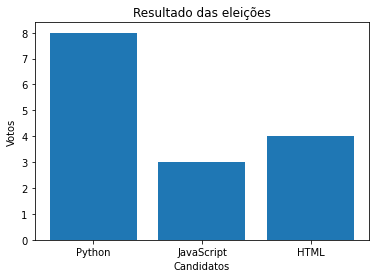

In [ ]:
candidatos = ['Python', 'JavaScript', 'HTML']
votos = [8, 3, 4]

graficoVotos(candidatos, votos)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a76c7d86-be6b-425a-abac-8cff1c93ac70' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>